<img src="img/full-colour-logo-UoB.png" alt="Drawing" style="width: 200px;"/>

# Introduction to Programming for Engineers

## Python 3




# 12 Simulation 2 : Object-Oriented Programming (OOP)
## CLASS MATERIAL

<br> <a href='#Classes'>1. Classes</a>
<br> <a href='#Methods'>2. Methods</a> 
<br> <a href='#References'>3. References</a> 
<br><a href='#Inheritance'>4. Inheritance</a> 
<br><a href='#StaticVariablesInstanceVariables'>5. Static Variables vs. Instance Variables</a>
<br> <a href='#ReviewExercises'>6. Review Exercises</a>

### Lesson Goal

Build simulations of multiple dissimilar objects.  

### Fundamental programming concepts

- Object-Oriented Programming : Using classes
- Using classes to produce simulations of physical systems
- Create animations of simulations

<a id='Classes'></a>
# 1. Classes

<br> <a href='#DefiningClass'>1.1 Defining a Class</a>
<br> <a href='#AnatomyClass'>1.2 Anatomy of a Class</a> 
<br> <a href='#Constructor'>1.3 The Constructor </a> 

__Class__ : a “classification” of an object. 
<br>e.g.“person” or “image.” 

__Object__ : a particular *instance* of a class. 
<br>e.g. "Hemma" is an instance of “Person.”



Objects have:
- attributes
- methods

__Attributes__ : *Variables* that belong an object.
<br>e.g. person's name, height, and age. 

__Methods__ : *Functions* belong to an object i.e. actions that an object can do.
<br>e.g. run, jump, sit.



If a program that has a set of variables like this for each object etc, then we can see that as the number of the objects in the program increases, the amount of data makes the code very long and very confusing. 

The code can also become very repetitive. 

For example, a certain type of object, e.g. boid might all share the same value of `max_speed`.  

In a large computer program, there may be hundreds of functions that deal with the object. 

Adding a new variable to the object could potentially require the developer to go through *every* function and add it to the list of arguments. 

That would be a lot of work!



Classes provide a better way to package data fields into *object types* so they can be managed easily.

This is called Object Oriented Programming (OOP).

### Example : Simulating Physical Systems
#### Trajectory : Plotting the Object
<a id='ExamplePlottingObject'></a>
A projectile is launched with initial velocity $v$, at an angle of $\theta$.

The drag force on the projectile is neglected. 

The projectile will travel in an arc.

 

Initial conditions:
 - $\theta = \pi/3$
 - velocity, $v=10$ms$^{-1}$ 

Position in the horizontal (x) and vertical (y) direction at time $t$ can be found by.

$x= vt\cos(\theta)$
<br>$y= vt\sin(\theta) - \frac{1}{2}gt^2$

where gravity, $g=9.81$ms$^{-2}$ 



<img src="img/projectile3.png" alt="Drawing" style="width: 300px;"/>


Let's first look at how we can generate this simulation using the method we studied last week. 

These are the steps for creating an animation using the `matplotlib.animation` package:

1. Variables
1. Figure window
1. Axes within the figure window.
1. Object(s) to animate
1. Function (e.g. `animate`) to update simulation as a function of time
1. Use the function `animation.FuncAnimation` to create the animation.

For the projectile:

1. Variables for $g$, $v$, and $\theta$
1. Figure window
1. Axes within the figure window.
1. Projectile object to animate
1. Function, `update` to find ther projectile's new position. 
1. Function `animate` to animate the motion of the projectile : x, y position as a function of time= frame number/10.  
1. Use the function `animation.FuncAnimation` to create the animation.

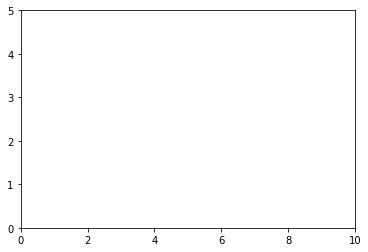

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

# 1. Figure window.
fig = plt.figure()

# 2. Axes within the window
ax = plt.axes(xlim=(0, 10), ylim=(0, 5))

# 3. Variables 
g = 9.81
v = 10
theta = np.pi/3

`plt.plot` returns a list of the objects plotted. 

Even if you plot only one object, it must be arranged as a list of 1 object.

In [68]:
a, b = [1, 2]
a, = [1, ]
b

2

In [69]:
# 4. Object to animate
point, = ax.plot([1], [1], marker='o', ms=40)  

In [70]:
# Find x and y position of the projectile as a function of time
def update(t):
    "Updates the x and y position of the projectile"
    x = v * t * np.cos(theta)
    y = v * t * np.sin(theta) - (0.5 * g * t**2)
    return x, y

In [71]:
# 5. 
# Function to animate the motion of the projectile. 
# Timestep = frame rate / 10
def animate(i):           # input = frame number
    x, y = update(i/10)   # pos = f (i/10)
    point.set_data(x, y)  # sets the x and y position of the object 
    return  (point,)      # return the axes

In [72]:
# 6. Animates the data

anim = animation.FuncAnimation(fig, 
                               animate, 
                               frames=30, 
                               interval=50, 
                               blit=True)

anim

We can plot the animation in the notebook:

In [73]:
from IPython.display import HTML
HTML(anim.to_jshtml())

<a id='AnatomyClass'></a>
## 1.1 Anatomy of a Class

Unlike functions and variables, class names __should__ begin with an upper case letter. 
<br>While it is possible to begin a class with a lower case letter, it is considered bad practice. 

The class attributes are set using a `.` dot. 

`self.` behaves like the pronoun 'my'.



Inside the class, we are talking about __my__ name , __my__ city, etc so we use `self.`

Outside of the class, we don't use `self.` because just like the  'my', it means someone totally different when said by someone else. 

In [74]:
class Address():
    """ Hold all the fields for a mailing address. """
    def __init__(self):
        """ This method sets up the class attributes. """
        self.name = None
        self.line1 = None
        self.line2 = None
        self.ward = None
        self.city = None
        self.code = None

<a id='Constructor'></a>
## 1.3 The Constructor 



`def __init__(self)` : a special function called a constructor that is run automatically when a class object is created.



- It must be named __`init`__
- It must be called on the second line of the class.
- It must have __two__ underscores before it *and* after it. 
- It must take `self` as an input parameter. 



The class definition does not create an *instance* of the class. 

Just like defining a function does not call the function. 

e.g. We don't actually have an address object in the program yet.  

To create an instance of the class, we give it a name, like a variable:

In [75]:
# Create an address
office_address = Address()

The class attributes are set using a `.` dot. 

`self.` behaves like the pronoun 'my'. 

Outside of the class, we don't use `self.` because just like the pronoun “my,” it means someone totally different when said by someone else. 

In [76]:
# Set the parameters OUTSIDE of the class
office_address.name = "Dr Philamore"
office_address.line1 = "Mechatronics Lab, Room d1S12"
office_address.line2 = "C Cluster, Kyotodaigaku Katsura,"
office_address.ward = "Nishikyoku"
office_address.city = "Kyoto"
office_address.code = "615-8410"

print(office_address.name)

Dr Philamore


An *instance* of the address class is created in line 2: the class Address name followed by parentheses. 

The __variable__ `office_address` is a *reference* to the `Address` class object that has just been created. 

The object name can be anything that follows normal naming rules (cannot begin with a number etc...).

In [77]:
home_address = Address()  # Create an address

In [78]:
name = "Hemma Philamore" # This does not set the address's name!
print(home_address.name)

None


In [79]:
Address.name = "Hemmma Philamore" # This does not set the address's name!
print(home_address.name)

None


In [80]:
home_address.name = "Hemma Philamore" # This sets the address's name.
print(home_address.name)

Hemma Philamore


In [81]:
print(home_address.name)

print(office_address.name)

Hemma Philamore
Dr Philamore


In [82]:
print(f"Address personal mail to {home_address.name}" )
print(f"Address official mail to {office_address.name}")

Address personal mail to Hemma Philamore
Address official mail to Dr Philamore


Storing lots of data in a class makes it easy to pass the data into and out of a function.

In [83]:
# Print an address to the screen
def print_address(address):
    print(address.name)
    
    # If there is a line1 in the address, print it
    if address.line1:
        print(address.line1)
        
    # If there is a line2 in the address, print it
    if address.line2:
        print( address.line2 )
        
    print(f"city : {address.city}")


In [84]:
print_address(home_address)
print()

print_address(office_address)

Hemma Philamore
city : None

Dr Philamore
Mechatronics Lab, Room d1S12
C Cluster, Kyotodaigaku Katsura,
city : Kyoto


<a id='DefiningClass'></a>
## 1.2 Defining a Class

Now let's learn how to build a class using this same example. 

We will create a class, `Projectile`.

In [85]:
class Projectile():
    """ A moving object """
    def __init__(self):
        """ This method sets up the class attributes. """
        self.position = np.array([0, 0])
        self.theta = np.pi/4 
        self.velocity = 10
        self.acceleration = 9.81

<a id='Methods'></a>
# 2. Methods

A method is a function that exists *inside* of a class. 

Consider a function:

```python
def update_pos():
    "Updates the x and y position of the projectile"
    x = v * t * np.cos(theta)
    y = v * t * np.sin(theta) - (0.5 * g * t**2)
    return x, y
        ```

In [86]:
class Projectile():
    """ A moving object """
    def __init__(self):
        """ This method sets up the class attributes. """
        self.position = np.array([0, 0])
        self.t = np.pi/4 
        self.v = 10
        self.a = 9.81
        self.point, = ax.plot([1], [1], marker='o', ms=40)  

    def update_pos(self, t):
        "Updates the x and y position of the projectile"
        self.position = np.array([self.v * t * np.cos(self.t),
                                  self.v * t * np.sin(self.t) - (0.5 * self.a * t**2)
                                 ])

    def update_anim(self, i):                 # input = frame number
        "Updates the animation"
        self.update_pos(i/10)                 # pos = f (i/10)
        self.point.set_data(self.position[0], # sets the x and y position of the object 
                            self.position[1]
                           )  
        return  (self.point,)                 # return the axes

Note that even through the method `update` has two parameters, `self, t`, the call does not pass the `self` argument.

We do not need to pass `self` when calling a method. 

Method definitions in a class look almost exactly like function definitions. 

The key difference is that the first input parameter is *always* `self`.  <br>This parameter is required even if it is not used in the function. 

Notice also the addition of `self` before any parameter that is a __class attribute__. 

`point` is a global variables. 


Important points when creating methods for classes:

- Attributes should be listed first, followed by methods.  
- The first parameter of any method must be `self`.
- Method definitions are indented by one tab space. 

Methods may be called in a manner similar to referencing attributes from an object.

```projectile.animate(10)```





These are the steps for creating an animation using the `matplotlib.animation` package:

1. Variables
1. Figure window
1. Axes within the figure window.
1. Object(s) to animate
1. Function (e.g. `update_anim`) to update simulation as a function of time
1. Use the function `animation.FuncAnimation` to create the animation.

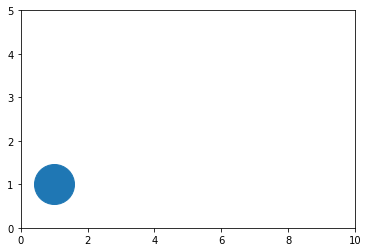

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation
from matplotlib import animation

# 2. Figure window.
fig = plt.figure()

# 3. Axes within the window
ax = plt.axes(xlim=(0, 10), ylim=(0, 5))
 
# 4. Object to animate
projectile = Projectile()

In [88]:
# 6. Animates the data
anim = animation.FuncAnimation(fig, 
                               projectile.update_anim, # 5. Function to update simulation 
                               frames=30, 
                               interval=50, 
                               blit=True)

anim

In [89]:
from IPython.display import HTML
HTML(anim.to_jshtml())

# Simulating Multiple Objects
Let's create an other class, `Mover`, which will be used to model a moving ball, similar to the projectile.

To begin with, the `Mover` will be a simple 2D model of a circular object, subject to gravity. 

Position of `Mover`
\begin{align*}
p &= p_{min} + D(p_{max} - p_{min})\\
\end{align*}

where $D$ is a random number in range 0 to 1

In [90]:
def random_xy(minimum, maximum):
    return (minimum  + np.random.rand(2) * (maximum - minimum))

In [91]:
# 1. Variables : The size of the simulation window
limits = np.array([10, 5])

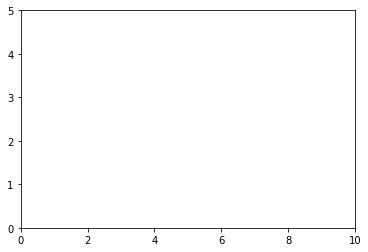

In [92]:
# 2+3. Figure window, Axes within the window
fig = plt.figure()
ax = plt.axes(xlim=(0, limits[0]), ylim=(0, limits[1]))
        

In [93]:
class Mover():
    """ A moving object """
    def __init__(self):
        """ This method sets up the class attributes. """
        self.p = np.array([np.random.rand(1) * limits[0]/2, 4.0]) # position
        self.v = np.array([0.0, 0.0])                             # velocity
        self.a = np.array([0.0, -9.81])                           # acceleration
        self.m_max = 5                                            # max mass
        self.m = np.random.rand(1) * self.m_max                   # randomly assign mass
        self.point, = ax.plot([self.p[0]],                        # plotted object for animation
                              [self.p[1]], 
                              marker='o', 
                              ms=self.m * 5)  # diameter = 5m pixels

    def update(self, t):
        "Updates the x and y position of the mover"
        self.v += self.a * t
        self.p += self.v * t

Model Simplification

The objects are modelled as a single point with the diameter given in pixels. 

For shapes drawn to scale that can be oriented in the plot refer to matplotlib.patches:

https://matplotlib.org/api/patches_api.html 

The `Mover` class provides a simple way to generate multiple moving objects with identical/similar properties.  



In [94]:
#np.random.seed = 0

n_movers = 10  # Number of objects
movers = []    # A list to store all objects created

# 4. Objects to animate
for n in range(n_movers):
    movers.append(Mover())

The `Animator` class is then created to deal with the animation of the simulation.

In [95]:
class Animator():
    """ A moving object """
    def __init__(self):
        """ This method sets up the class attributes. """
        

    def animate(self, i):           # input = frame number
        "Updates the animation"
        
        points = []                 # creates a list of objects to plot
        
        for mover in movers:                 # loops through all movers
            mover.update(i/200.0)            # update position (time, t = timestep / 200)
            mover.point.set_data(mover.p[0], # update position of objects in figure
                                 mover.p[1]
                               )  
            points.append(mover.point)       # add each figure object to a list
        return(points)                       # return list of figure objects to update animation

In [96]:
animator = Animator() # instance of animator

# 6. Animate the data
anim = animation.FuncAnimation(fig,              # figure to animate
                               animator.animate, # 5. Function to update simulation 
                               frames=50,        # number of timesteps
                               interval=50,      # ms between each frame
                               blit=True)        # remove all old figure data

anim

In [97]:
from IPython.display import HTML
HTML(anim.to_jshtml())

# Interaction with the Environment
In the current simulation, the object to not interact with the axes in which the simluation is diplayed. 

Let's look at how we can use these axes as the boundary of the simulation. 

<img src="img/ball.png" alt="Drawing" style="width: 300px;"/>

The `movers` bounce off the axes by:
- inverting the sign of the velocity in the axes where the collision ocurred.
- capping the value of the objects position at the limits of the axes

```
# bounce off the axes window
if self.p[0] > limits[0]:
    self.p[0] = limits[0]
    self.v[0] *= -1
if self.p[0] < 0:
    self.p[0] = 0
    self.v[0] *= -1
if self.p[1] > limits[1]:
    self.p[1] = limits[1]
    self.v[1] *= -1    
if self.p[1] < 0:
    self.p[1] = 0
    self.v[1] *= -1  
            ```

In [98]:
class Mover():
    """ A moving object """
    def __init__(self):
        """ This method sets up the class attributes. """
        self.p = np.array([np.random.rand(1) * limits[0]/2, 4.0]) # position
        self.v = np.array([0.0, 0.0])                             # velocity
        self.a = np.array([0.0, -9.81])                           # acceleration
        self.m_max = 5                                            # max mass
        self.m = np.random.rand(1) * self.m_max                   # randomly assign mass
        self.point, = ax.plot([self.p[0]],                        # plotted object for animation
                              [self.p[1]], 
                              marker='o', 
                              ms=self.m * 5)  # diameter = 5m pixels

    def update(self, t):
        "Updates the x and y position of the mover"
        self.v += self.a * t
        self.p += self.v * t
        
        # bounce off the axes window
        if self.p[0] > limits[0]:
            self.p[0] = limits[0]
            self.v[0] *= -1
        if self.p[0] < 0:
            self.p[0] = 0
            self.v[0] *= -1
        if self.p[1] > limits[1]:
            self.p[1] = limits[1]
            self.v[1] *= -1    
        if self.p[1] < 0:
            self.p[1] = 0
            self.v[1] *= -1        

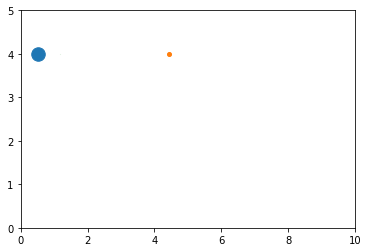

In [99]:
# 1. Figure window.
fig = plt.figure()

# 2. Axes within the window
ax = plt.axes(xlim=(0, 10), ylim=(0, 5))

n_movers = 3
movers = []

# 3. Create objects to animate
for n in range(n_movers):
    movers.append(Mover())

In [100]:
animator = Animator()

# 6. Animate the data
anim = animation.FuncAnimation(fig,              # figure to animate
                               animator.animate, # 5. Function to update simulation 
                               frames=100,       # number of timesteps
                               interval=50,      # ms between each frame
                               blit=True)        # remove all old figure data

anim

In [101]:
from IPython.display import HTML
HTML(anim.to_jshtml())

# Time-Dependent Inputs
The `Mover` is subject to a constant force, gravity. 

However, simulation provides a useful tool for observing the behaviour of time-dependent inputs to a system. 

Let's introduce an additional time-dependent force to the `Mover` class. 

The force, `horiz_force` will act on a `mover` until the time, `t` exceeds some threshold `t_max`. 

```python
    def horiz_force(self, F, t, t_max):
            """
            F : horizontal component of force vector
            t : time
            t_max : threshold at which F ceases
            """
            if t<t_max:                   
                self.a += np.array([F, 0]) / self.m
    
```    

As the force applied to a `Mover` is no longer constant throughout the simulation, we need a new approach to the `update` function:

```python
def update(self, t):
        "Updates the x and y position of the projectile"
        
        # reset acceleration
        self.a = np.array([0.0, 0.0])    # reset acceleration to 0
        self.horiz_force(100, t, 0.02)   # apply horizontal force (time dependent) 
        self.a += np.array([0.0, -9.81]) # apply gravitational force (constant)
        
        # update velocoity and position    
        ...
                            
        # bounce off the axes window
        ...
```

In [102]:
class Mover():
    """ A moving object """
    def __init__(self):
        """ This method sets up the class attributes. """
        self.p = np.array([0.1, 4])    # position
        self.v = np.array([0.0, 0.0])  # velocity
        self.a = np.array([0, -9.81])  # acceleration
        self.m_max = 10                # max mass
        self.m = np.random.uniform(low=self.m_max/4, high=self.m_max, size=(1,))  # mass
        self.point, = ax.plot([self.p[0]], 
                              [self.p[1]], 
                              marker='o', 
                              ms=self.m * 5)  # diameter = 5m pixels
        
        
    def horiz_force(self, F, t, t_max):
        "A horizontal force on the mover"
        if t<t_max:                   
            self.a += np.array([F, 0]) / self.m
        
    def update(self, t):
        "Updates the x and y position of the projectile"
        
        # reset acceleration
        self.a = np.array([0.0, 0.0])    # reset acceleration to 0
        self.horiz_force(100, t, 0.02)   # apply horizontal force (time dependent) 
        self.a += np.array([0.0, -9.81]) # apply gravitational force (constant)
        
        # update velocoity and position    
        self.v += self.a * t
        self.p += self.v * t
                            
        # bounce off the axes window
        if self.p[0] > limits[0]:
            self.p[0] = limits[0]
            self.v[0] *= -1
        if self.p[0] < 0:
            self.p[0] = 0
            self.v[0] *= -1
        if self.p[1] > limits[1]:
            self.p[1] = limits[1]
            self.v[1] *= -1    
        if self.p[1] < 0:
            self.p[1] = 0
            self.v[1] *= -1 
                

In [103]:
np.array([4.5, 0]) / 5

array([0.9, 0. ])

In [104]:
# class Animator():
#     """ A moving object """
#     def __init__(self):
#         """ This method sets up the class attributes. """

#     def animate(self, i):           # input = frame number
#         "Updates the animation"
        
#         points = []
        
#         for mover in movers:
#             mover.update(i/500)
#             mover.point.set_data(mover.p[0], # update position
#                                  mover.p[1]
#                                )  
#             print(mover.a)
            
#             points.append(mover.point)    
#         return(points)

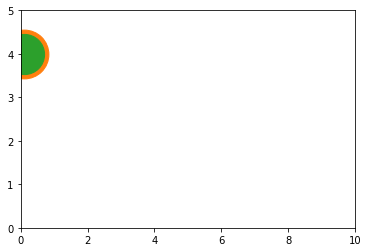

In [105]:
np.random.seed = 0 

# 1. Figure window.
fig = plt.figure()

# 2. Axes within the window
ax = plt.axes(xlim=(0, 10), ylim=(0, 5))

n_movers = 3
movers = []

for n in range(n_movers):
    movers.append(Mover())

In [106]:
animator = Animator()

anim = animation.FuncAnimation(fig, 
                               animator.animate, 
                               frames=100, 
                               interval=50,
                               blit=True)

anim

In [107]:
from IPython.display import HTML
HTML(anim.to_jshtml())

# Interaction with Other Objects

The use of classes allows us to create interaction  between multiple objects. 

<img src="img/boids.png" alt="Drawing" style="width: 400px;"/>

This is particularly useful when creating dissimilar objects. 

For example, let's simulate a circular mass interacting with a fluid. 

<img src="img/bouyancy.jpg" alt="Drawing" style="width: 300px;"/>

<img src="img/bouyancy.jpg" alt="Drawing" style="width: 100px;"/>

The mass is subject to 3 forces in the vertical direction:
 
__Gravity__ 
$F_g = ma = mg$
<br>$g$ = acceleration due to gravity

__Buoyancy__
$F_b = -g \rho_L V$
<br>$\rho_L$ = density of fluid
<br>$V$ = submerged volume


__Drag__
$F_d = -0.5 * sign(v_y) C_d v_y^2 A   \rho_L$
<br>$C_d$ = drag coefficient = 0.47 for sphere/circle 
<br>$A$ = area
<br>$v_y$ = y component of velocity

Model Simplifications:
    
Drag force in air, $F_{d,a} = 0$

Submerged volume = total volume for all `t` in contact with fluid. 

Submerged area = total area for all `t` in contact with fluid. 

In [108]:
limits = np.array([10, 10]) # set size of simulation window

In [109]:
class Liquid :
    def __init__(self, _depth, _rho):
        """ This method sets up the class attributes. """
        self.depth = _depth
        self.rho = _rho
        self.draw_liquid()
        
    def draw_liquid(self):
        x = range(limits[0] + 1)
        y = [self.depth] * (limits[0] + 1)
        print(limits[0] + 1)
        print(len(y))
        ax.fill_between(x, 0, y)

Until now, all properties have been assigned to `movers` automatically. 

Variation among intances is introduced using random variables. 

However, we can also assign variables when creating an instance of a class by making them inputs to the `__init__` function:


```python
class Mover():
    """ A moving object """
    def __init__(self, m):
        """ This method sets up the class attributes. """
        self.p = np.array([np.random.rand(1) * limits[0], 9]) # position
        self.v = np.array([0.0, 0.0])                         # velocity
        self.a = np.array([0, -9.81])                         # acceleration
        
        self.m = m   # **The variable assigned when a class is instantiated **
        ...
        ```



The properties of each object are assigned according to the mass that is input when instantiating an instance of the class, `Mover`. 

```python
self.m = m                                     # mass 
self.rho = 2.5                                 # density
self.V = self.m / self.rho                     # volume = mass / density
self.r = ((3 * self.V) / (4 * np.pi))**(1/3)   # radius = (3 * volume / 4 * pi)^(1/3)
self.A =  4 *  np.pi * self.r**2               # area sphere = 4 * pi * r^2
self.c = 0.47                                  # drag coefficient
        ```

We create a function for the acceleration due to the drag force : 

$$a_d = F_d / m$$

```python
def drag(self, liquid):    
    if(self.p[1] < liquid.depth):
  
        self.a[1] += (-0.5 * 
                      np.sign(self.v[1]) * 
                      self.v[1]**2 * 
                      self.A * 
                      self.c * 
                      liquid.rho) / self.m
        ```

We create a function for the acceleration due to the buoyancy force : 

$$a_b = F_b / m$$

```python
def buoyancy(self, t):
    if(self.p[1] < liquid.depth):
            self.a[1] += (9.81 * liquid.rho * self.V) / self.m
            ```

In [110]:
def update(self, t):
    "Updates the x and y position of the projectile"

    # reset acceleration
    self.a = np.array([0.0, 0.0])    # reset acceleration to 0
    self.a += np.array([0.0, -9.81]) # apply gravitational force (constant)
    self.drag(liquid)                # apply force due to liquid (position dependent) 
    self.buoyancy(liquid)

In [111]:
class Mover():
    """ A moving object """
    def __init__(self, m):
        """ This method sets up the class attributes. """
        self.p = np.array([np.random.rand(1) * limits[0], 9]) # position
        self.v = np.array([0.0, 0.0])                         # velocity
        self.a = np.array([0, -9.81])                         # acceleration
        
        self.m = m                                     # mass 
        self.rho = 2.5                                 # density
        self.V = self.m / self.rho                     # volume = mass / density
        self.r = ((3 * self.V) / (4 * np.pi))**(1/3)   # radius = (3 * volume / 4 * pi)^(1/3)
        self.A =  4 *  np.pi * self.r**2               # area sphere = 4 * pi * r^2
        self.c = 0.47                                  # drag coefficient
        
        self.point, = ax.plot([self.p[0]], 
                              [self.p[1]], 
                              marker='o', 
                              color = 'm',
                              ms=self.m * 5) # diameter = 5m pixels 

        
#     def horiz_force(self, F, t, t_max):
#         "A horizontal force on the mover"
#         if t<t_max:                   
#             self.a += np.array([F, 0]) / self.m
            
    def drag(self, liquid):    
        if(self.p[1] < liquid.depth):
            self.a[1] += (-0.5 * 
                          np.sign(self.v[1]) * 
                          self.v[1]**2 * 
                          self.A * 
                          self.c * 
                          liquid.rho) / self.m
            
    def buoyancy(self, t):
        if(self.p[1] < liquid.depth):
                self.a[1] += (9.81 * liquid.rho * self.V) / self.m

        
    def update(self, t):
        "Updates the x and y position of the projectile"
        
        # reset acceleration
        self.a = np.array([0.0, 0.0])    # reset acceleration to 0
        self.a += np.array([0.0, -9.81]) # apply gravitational force (constant)
        self.drag(liquid)                # apply force due to liquid (position dependent) 
        self.buoyancy(liquid)
        
        # update velocoity and position    
        self.v += self.a * t
        self.p += self.v * t
            
                
        # bounce off the axes window
        if self.p[0] > limits[0]:
            self.p[0] = limits[0]
            self.v[0] *= -1
        if self.p[0] < 0:
            self.p[0] = 0
            self.v[0] *= -1
        if self.p[1] > limits[1]:
            self.p[1] = limits[1]
            self.v[1] *= -1    
        if self.p[1] < 0:
            self.p[1] = 0
            self.v[1] *= -1 
                

11
11


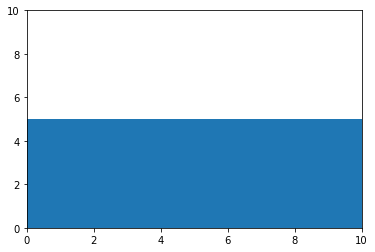

In [112]:
# 1. Figure window.
fig = plt.figure()

# 2. Axes within the window
ax = plt.axes(xlim=(0, limits[0]), ylim=(0, limits[1]))


        
# # 3. Objects to animate        
liquid = Liquid(limits[1]/2, 2) # liquid depth and density (water = 1)

In [113]:
masses = [2, 5, 10]             # list of masses
movers = []        


for m in (masses):
    movers.append(Mover(m))

    
animator = Animator()


anim = animation.FuncAnimation(fig, 
                               animator.animate, 
                               frames=100, 
                               interval=50,
                               blit=True)

anim

from IPython.display import HTML
HTML(anim.to_jshtml())

<a id='References'></a>
# 3. References

<br> <a href='#FunctionsReferences'>3.1 Functions and References</a>


Recall, we create an *instance* of a class using the class name followed by parentheses. 

e.g. `my_address = MyAddress()`

The variable `my_address` is a __reference__ to the `Address` class object that has just been created. 

What does this mean in a practical sense? 

Conside the example below:

In [114]:
class Student():
    def __init__(self):
        self.name = ""
        self.score = 0

In [115]:
# create a reference to a Student object
farhad = Student()
farhad.name = "Farhad"
farhad.score = 100


# create a reference to ANOTHER Student object
ayako = Student()
ayako.name = "Ayako"
 
    
print(farhad.name, "has", farhad.score, "points.")
print(ayako.name, "has", ayako.score, "points.")

Farhad has 100 points.
Ayako has 0 points.


The example below is almost the same, but has an important difference:

In [116]:
# create a reference to a Student object
farhad = Student()
farhad.name = "Farhad"
farhad.score = 100


# create a reference to THE SAME Student object
ayako = farhad
ayako.name = "Ayako"
 
    
print(farhad.name, "has", farhad.score, "points.")
print(ayako.name, "has", ayako.score, "points.")

Ayako has 100 points.
Ayako has 100 points.


A common error when working with objects is to assume that the variable `farhad` *is* the `Student` object. 

This is not the case. 

The variable `farhad` is a __reference__ to the `Student` object. 

The variable `ayako` copies the reference, so is a reference to __the same__ `Student` object. 

<img src="img/references.png" alt="Drawing" style="width: 600px;"/>







The reference stores the *memory address* of where the object is, and *not* the object itself.

The address refers to the place in computer memory for where the object is stored. 

This address is a hexadecimal number which, if printed out, might look something like 0x1e504.

The reference is also known as an *address*, *pointer* or *handle*. 

If `farhad` actually was the object, then:
-  `ayako = farhad` would create a copy of the `farhad` object and there would be two objects. 
- The output of the program would show `Farhad` and `Ayako` having 100 dollars *not* `Ayako` and `Ayako` having 100 dollars. 

<a id='FunctionsReferences'></a>
## 3.1 Functions and References

Look at the example below. 

Line 1 creates a function that takes a number as an input parameter. 

`score` is a variable that contains a copy of the data that was passed in. 

Adding 100 to that number does not change the number stored in `farhad.score`. 

In [117]:
def add_points1(score):
    score += 100
    
add_points1(farhad.score)

print(farhad.score)

add_points1(farhad.score)

print(farhad.score)

100
100


The print therefore prints `100`, not `200`.

A local variable `score` is created within `add_points1`.

<img src="img/add_points1.png" alt="Drawing" style="width: 400px;"/>

Alternatively, the code below __does__ increase `farhad.score`

In [118]:
def add_points2(student):
    student.score += 100
    
    
add_points2(farhad)


print(farhad.score)

200


### What does this code do?

The parameter `student` contains a *copy* of the memory address of the object, *not* the actual object. 

Data structures (lists) work the same way. 

A function that takes in a list as a parameter can modify elements of the list using the list index. 

The index is *reference/pointer* to the element. 

In [119]:
def change_my_list(my_list):
    """ Add 2 to each item in the list """
    
    for i in list(range(len(my_list))):
        my_list[i]+=2
        
a_list = [0, 1, 2]

change_my_list(a_list)

print(a_list)

[2, 3, 4]


<a id='Inheritance'></a>
# 4. Inheritance

<br> <a href='#super'>4.1 `super`</a>
<br> <a href='#Overriding'>4.2 Overriding</a>

It is possible to create a class and inherit all of the attributes and methods of a parent class.

For example, a class called `Mover` could have all the attributes needed to represent a moving physical object. 

In [120]:
class Mover():
    """ A moving object """
    def __init__(self, m):
        """ This method sets up the class attributes. """
        self.p = np.array([np.random.rand(1) * limits[0], 4]) # position
        self.v = np.array([0.0, 0.0])                         # velocity
        self.a = np.array([0, -9.81])                         # acceleration
        self.m = m
        self.point, = ax.plot([self.p[0]], 
                              [self.p[1]], 
                              marker='o', 
                              color = 'm',
                              ms=self.m * 5) 
            
    def update(self, t):
        "Updates the x and y position of the projectile"
        
        # reset acceleration
        self.a = np.array([0.0, 0.0]) # reset any constant values
        self.a += np.array([0.0, -9.81]) # reset any constant values
        
        # update velocoity and position    
        self.v += self.a * t
        self.p += self.v * t
            
                
        # bounce off the axes window
        if self.p[0] > limits[0]:
            self.p[0] = limits[0]
            self.v[0] *= -1
        if self.p[0] < 0:
            self.p[0] = 0
            self.v[0] *= -1
        if self.p[1] > limits[1]:
            self.p[1] = limits[1]
            self.v[1] *= -1    
        if self.p[1] < 0:
            self.p[1] = 0
            self.v[1] *= -1 
                
        

In [121]:
p = Mover(2)

print(p.p)
print(p.a)

p.update(1)

print(p.p)


[array([5.2084815]) 4]
[ 0.   -9.81]
[array([5.2084815]) 0]


Now let's create a physical object that does everything the mover does and additionally experiences some initial horizontal force.

We'll call it `Projectile`.

A `Projectile` can do everything a `Mover` can do, *and additionally* the `Projectile` has an initial impulse acting on it. 



Without inheritance we have two options:
- add the `horizontal_force()` method to a `Mover` object. <br>This can confuse things as not all movers experience an initial impulse. 

- create a copy of the `Mover` class and call it `Projectile` and add the `horizontal_force()` method to the `Projectile` class. <br>This can cause problems if we make changes to the `Person` class. <br>Any changes they made to the `Mover` class must be replicated in the `Projectile` class. <br>Maintaining this synchronicity is time consuming and error-prone.

Inheritance allows us to create child classes that __inherit__ all attributes and methods of the parent class. 

We can then add attributes and methods that are specific to the child class. 

If the parent class is changed, the child class will automatically inherit the changes. 

In [122]:
class Projectile(Mover):
    """ A moving object subject to an initial horizontal force"""       
        
    def horiz_force(self, F, t, t_max):
        "A horizontal force on the mover"
        if t<t_max:                   
            self.a += np.array([F, 0]) / self.m        

`projectile` has inherited all attributes and methods from the `Mover` class. 

The method `horiz_force` was added to `Projectile`. 

However, `horiz_force` is not yet applied to the mover when computing its overall acceleration using the `update` method

In [123]:
projectile = Projectile(2)

projectile.horiz_force(100,   # apply force = 100
                       0.01,  # time
                       0.02)  # time at which force ceases to be applied

print(projectile.a)

[50.   -9.81]


In [124]:
projectile = Projectile(2)

projectile.update(0.01)

print(projectile.a)

[ 0.   -9.81]


<a id='super'></a>
## 4.1 `super`
Using `super()` followed by a dot `.` and then a method name allows you to call the parent's version of the method and add to it.



Let's create a function, `calculate_a` that is called in `update`. 

`Mover` version:

    def calculate_a(self, t):
        # reset acceleration
        self.a = np.array([0.0, 0.0]) 
        self.a += np.array([0.0, -9.81]) 

`Projectile` version: 

    def calculate_a(self, t):
        # reset acceleration
        self.a = np.array([0.0, 0.0]) 
        self.a += np.array([0.0, -9.81]) 
        self.horiz_force(100, t, 0.02)


In [125]:
class Mover():
    """ A moving object """
    def __init__(self, m):
        """ This method sets up the class attributes. """
        self.p = np.array([np.random.rand(1) * limits[0], 4]) # position
        self.v = np.array([0.0, 0.0])                         # velocity
        self.a = np.array([0, -9.81])                         # acceleration
        self.m = m
        self.point, = ax.plot([self.p[0]], 
                              [self.p[1]], 
                              marker='o', 
                              color = 'm',
                              ms=self.m * 5) 
        
    def calculate_a(self, t):
        # reset acceleration
        self.a = np.array([0.0, 0.0]) # reset any constant values
        self.a += np.array([0.0, -9.81]) # reset any constant values
        
               
    def update(self, t):
        "Updates the x and y position of the projectile" 
        
        self.calculate_a(t)
        
        # update velocoity and position    
        self.v += self.a * t
        self.p += self.v * t
                
        # bounce off the axes window
        if self.p[0] > limits[0]:
            self.p[0] = limits[0]
            self.v[0] *= -1
        if self.p[0] < 0:
            self.p[0] = 0
            self.v[0] *= -1
        if self.p[1] > limits[1]:
            self.p[1] = limits[1]
            self.v[1] *= -1    
        if self.p[1] < 0:
            self.p[1] = 0
            self.v[1] *= -1 
                
        

The class `Projectile` calls the `super` version of the `calculate_a` method and adds the `horiz_force` function call:

In [126]:
class Projectile(Mover):
    """ A moving object subject to an initial horizontal force"""       
        
    def horiz_force(self, F, t, t_max):
        "A horizontal force on the mover"
        if t<t_max:                   
            self.a += np.array([F, 0]) / self.m   
            
    def calculate_a(self, t):        
        super().calculate_a(t)            # Run the parent function        
        self.horiz_force(100, t, 0.02)   # Add more actions to the end 
            

`projectile` has inherited all attributes and methods from the `Mover` class. 

The method `horiz_force` was added to `Projectile`. 

`calculate_a` is edited to include `horiz_force`. 

`calculate_a` is called in the `update` method.

In [127]:
projectile = Projectile(2)

projectile.horiz_force(100, 0.01, 0.02)

print(projectile.a)


[50.   -9.81]


In [128]:
projectile = Projectile(2)

projectile.update(0.01)

print(projectile.a)

[50.   -9.81]


We can also add variables to a child class.

`DragObject` calls the `__init__` function from parent class `Mover` and adds the attributes, `rho`, `V`, `r` ...:

In [129]:
class DragObject(Mover):
    
    # Child class constructor with any arguments 
    # (including those used in parent)
    def __init__(self, m):
        # Call the parent/super class constructor first with any aruguments
        super().__init__(m)
 
        # Variables specific to the child class
        self.rho = 2.5                                 # density
        self.V = self.m / self.rho                     # volume = mass / density
        self.r = ((3 * self.V) / (4 * np.pi))**(1/3)   # radius = (3 * volume / 4 * pi)^(1/3)
        self.A =  4 *  np.pi * self.r**2               # area sphere = 4 * pi * r^2
        self.c = 0.47 

In [130]:
drag_o = DragObject(2)
print(drag_o.A)

4.167517662942436


<a id='Overriding'></a>
## 4.2 Overriding
Methods can be overridden by a child class to achive different functionality.

An alternative strategy to the previous example:
Instead of creating an additional method `calculate_a` that can be easily edited to produce more child subject to different forces, the `update` function is overwritten. 

The new function includes: `self.drag(liquid)`


In [131]:
class DragObject(Mover):
    
    def __init__(self, m):
        # Call the parent/super class constructor first with any aruguments
        super().__init__(m)
 
        # Variables specific to the child class
        self.rho = 2.5                                 # density
        self.V = self.m / self.rho                     # volume = mass / density
        self.r = ((3 * self.V) / (4 * np.pi))**(1/3)   # radius = (3 * volume / 4 * pi)^(1/3)
        self.A =  4 *  np.pi * self.r**2               # area sphere = 4 * pi * r^2
        self.c = 0.47 
        
    def drag(self, liquid):    
        if(self.p[1] < liquid.depth):
            self.a[1] += (-0.5 * 
                       np.sign(self.v[1]) * 
                       self.v[1]**2 * 
                       self.A * 
                       self.c * 
                       liquid.rho)
            
    def update(self, t):
        "Updates the x and y position of the projectile"
        
        # reset acceleration
        self.a = np.array([0.0, 0.0])    
        self.a += np.array([0.0, -9.81]) 
        self.drag(liquid)
        
        # update velocoity and position    
        self.v += self.a * t
        self.p += self.v * t
                     
        # bounce off the axes window
        if self.p[0] > limits[0]:
            self.p[0] = limits[0]
            self.v[0] *= -1
        if self.p[0] < 0:
            self.p[0] = 0
            self.v[0] *= -1
        if self.p[1] > limits[1]:
            self.p[1] = limits[1]
            self.v[1] *= -1    
        if self.p[1] < 0:
            self.p[1] = 0
            self.v[1] *= -1    
    

<a id='StaticVariablesInstanceVariables'></a>
# 5. Static Variables vs. Instance Variables



The difference between static and instance variables can be confusing. 

__Instance Variable__ : <br>The type of class variable we've used so far. <br>Each instance of the class gets its own value. 
<br>For example, each person has their own age. 
<br>With instance variables, we can't just use the variable `age`. We need to specify whose age we are talking about. <br>Also, if there are no people, then referring to an age will not make sense.

__Static Variable__ : <br>The value is the same for every single instance of the class. <br>Even if there are no instances, there still is a value for a static variable. <br>For example, we could have a `count` static variable for the number of `Person` objects in existence. If there are no people, this value is zero, but it still exists.

In [132]:
# Example of an instance variable
class ClassA():
    def __init__(self):
        self.y = 3


# Example of a static variable
class ClassB():
    x = 7

    
# Create class instances
a = ClassA()
b = ClassB()
 
    
# Two ways to print the static variable.
print(b.x)
print(ClassB.x)
 
# One way to print an instance variable.
# The second generates an error, (we don't know what instance to reference.)
print(a.y)
print(ClassA.y)

7
7
3


AttributeError: type object 'ClassA' has no attribute 'y'

Lines 16 and 17 print out the static variable. 
<br>(Line 17 is the “proper” way to do this.) 

Unlike before, we can refer to the __class name__ when using __static variables__, (rather than a variable that points to a particular instance). 





By looking at line 17 we instantly can tell we are working with a static variable because of the the class name.

Line 16 could be either an instance or static variable. 

This confusion makes line 17 the better choice.

Line 22 prints out the instance variable, just like in previous examples. 

Line 23 will generate an error because each instance of y is different. y is not. agernal parameter for all instances of ClassA. 

It is possible to have a static variable, and an instance variable with the same name. 

In [ ]:
# Class with a static variable
class ClassB():
    x = 7
 
# Create a class instance
b = ClassB()
 
# This prints 7
print(b.x)
 
# This also prints 7
print(ClassB.x)

In [ ]:
# Set x to a new value using the class name
ClassB.x = 8
 
# This also prints 8
print(b.x)
 
# This prints 8
print(ClassB.x)

In [ ]:
# Set x to a new value using the instance b.
# It creates a new attribute instance, x. 
# The static variable is also called x.
# But they are two different variables. 
b.x = 9
 
# This prints 9
print(b.x)
 

# This prints 8. NOT 9!!!
print(ClassB.x)

# Summary
<a id='Summary'></a>
- __Class__ : a “classification” of an object. 
<br>e.g.“person” or “image.” 

- __Object__ : a particular *instance* of a class. 
<br>e.g. "Hemma" is an instance of “Person.”

- __Attributes__ : *Variables* that belong an object.
<br>e.g. person's name, height, and age. 

- __Methods__ : *Functions* belong to an object i.e. actions that an object can do.
<br>e.g. run, jump, sit.

- Class names should begin with a capital letter e.g. Fish, Person

- Every class should have a constructor method called `__init__` to set up the class attributes. 

- Inheritance allows us to create child classes that __inherit__ all attributes and methods of the parent class. 

- Using `super()` followed by a dot `.` and then a method name allows you to call the parent's version of the method.

- If `super` is not used, the parent methid can be overwritten with a new methid of the same name. 

- __Instance Variable__ : Each instance of the class gets its own value. 

- __Static Variable__ : The value is the same for every single instance of the class. 

<a id='ReviewExercises'></a>
# 6. Review Exercises

Compete the exercises below.


# Review Exercise 1: An instance of a class
In the cell below, write code to create an instance of this class and set its attributes. 

In [ ]:
# Review Exercise 1: An instance of a class
class Cat():
    def __init__(self):
        self.age = None
        self.name = None
        self.weight = None

# Review Exercise 2: Multiple objects 
Write code to create two different instances of this class and set attributes for both objects. 

*Hint: While a phone number is a number BUT it should be stored as string to keep leading zeros and dashes*.

In [ ]:
# Review Exercise 2: Multiple objects 
class Person():
    def __init__(self):
        self.name = ""
        self.cell_phone = ""
        self.email = ""

# Review Exercise 3: Write a Class

For the code below, write a class that has the appropriate class name and attributes that will allow the code to work.

In [ ]:
# Review Exercise 3: Write a Class
my_fish = Fish()
my_fish.color = "green"
my_fish.name = "Eric"
my_fish.breed = "Saba"

# Review Exercise 4: Correct the Errors

Find and correct the errors in the code below:

a) The code should give the person `hemma` 100 units of money.

b) The code should print `Farhad has 0 yen`. 

In [ ]:
# Review Exercise 5a: Correct the Errors
class Person():
    def __init__(self):
        self.name = ""
        self.money = 0
 
hemma = Person()
name = "Hemma"
money = 100
print(hemma.money)

In [ ]:
# Review Exercise 5b: Correct the Errors
class Human():
    def __init__(self):
        self.name = ""
        self.money = 0
 
farhad = Human()
print(farhad.name, "has", money, "yen")